## Содержание
- [Описание задачи](#link1)


## Описание задачи
<a id='link1'></a>

Вы сотрудник Отдела Data Science популярного музыкального стримингового сервиса "МиФаСоль". Сервис расширяет работу с новыми артистами и музыкантами,
в связи с чем возникла задача - правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. Ваши коллеги из отдела работы со звуком подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. Ваша задача - разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.

### Этапы

- загрузка и ознакомление с данными,
- предварительная обработка,
- полноценный разведочный анализ,
- разработка новых синтетических признаков,
- проверка на мультиколлинеарность,
- отбор финального набора обучающих признаков,
- выбор и обучение моделей,
- итоговая оценка качества предсказания лучшей модели,
- анализ важности ее признаков.


### Дополнительное задание

Для тех, кому этого покажется мало у нас есть дополнительное задание — реализовать решение с использованием технологии pipeline (из библиотеки sklearn, imblearn).
Подготовка отчета по исследованию. 

Если останется время можно подготовить полноценный отчет по исследовательской работе Дата Сайнтиста. Примеры хороших отчетов можно посмотреть на сайте Stanford University - отчеты по финальным проектам направления Machine Learning - https://cs229.stanford.edu/projects2014.html. Из примеров понятно наполнение отчета по исследованию, а так же, что главное - понятна сама структура отчета. В реальной работе именно такой формат отчета обычно завершает исследование.

### Описание полей данных

- instance_id -Уникальный идентификатор трека
- track_name - Название трека
- popularity - Популярность трека
- acousticness - Мера уверенности от 0,0 до 1,0 в том, что трек является акустическим. 1,0 означает высокую степень уверенности в том, что трек является акустическим.
- danceability - Танцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу ударов и общую регулярность. Значение 0,0 означает наименьшую танцевальность, а 1,0 - наибольшую танцевальность.
- duration_ms - Продолжительность трека в миллисекундах.
- energy - Энергия это показатель от 0,0 до 1,0, представляющий собой меру интенсивности и активности. Как правило, энергичные композиции ощущаются как быстрые, громкие и шумные. Например, дэт-метал обладает высокой энергией, в то время как прелюдия Баха имеет низкую оценку этого параметра
- instrumentalness - Определяет, содержит ли трек вокал. Звуки "Ooh" и "aah" в данном контексте рассматриваются как инструментальные. Рэп или разговорные треки явно являются "вокальными". Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокала
- key - базовый ключ (нота) произведения
- liveness - Определяет присутствие аудитории в записи. Более высокие значения liveness означают увеличение вероятности того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек исполняется вживую
- loudness - Общая громкость трека в децибелах (дБ)
- mode - Указывает на модальность (мажорную или минорную) трека
- speechiness - Речевой характер определяет наличие в треке разговорной речи. Чем более исключительно речевой характер носит запись (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1,0. Значения выше 0,66 характеризуют треки, которые, вероятно, полностью состоят из разговорной речи. Значения от 0,33 до 0,66 характеризуют треки, которые могут содержать как музыку, так и речь, как в виде фрагментов, так и в виде слоев, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки.
- tempo - Темп трека в ударах в минуту (BPM). В музыкальной терминологии темп представляет собой скорость или темп данного произведения и напрямую зависит от средней продолжительности тактов
- obtained_date - дата загрузки в сервис
- valence - Показатель от 0,0 до 1,0, характеризующий музыкальный позитив, передаваемый треком. Композиции с высокой валентностью звучат более позитивно (например, радостно, весело, эйфорично), а композиции с низкой валентностью - более негативно (например, грустно, депрессивно, сердито)
- music_genre - Музыкальный жанр трека

## Импорт библиотек

In [3]:
# импортируем стандартные библиотеки
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import os
import time

# Импортируем библиотеки классфикации
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# загружаем классы для подготовки данных
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler,
    LabelEncoder)
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# импортируем классы для перебора параметров 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# загружаем функцию для работы с метриками
from sklearn.metrics import f1_score, confusion_matrix, make_scorer

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем функцию для работы с метриками
from sklearn.metrics import mean_squared_error

import phik

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 8)

## Загрузка и EDA, предобработка

In [3]:
def df_uni_describe(df):
    """
    универсальная функция для описания датафрейма
    """
    try:
        print("\033[1m" + 'Main info:' + "\033[0m")
        print("Number of variables:", len(df.columns))
        print("Number of observations:", len(df))
        print('Total missing: {:.2%}'.format(df.isna().sum().sum()/(len(df.columns)*len(df))))
        print('Total duplicates: {}'.format(df.duplicated().sum()))
#         print('Total size of dataFrame: {} MB.'.format(sys.getsizeof(df)/1000000)) #мой расчет не совпадаетс оценкой info, пометка чтобы разобратьсяв будущем.
        if df.isna().sum().sum() > 0:
            print("\033[1m" + 'Missing (NaNs), %' + "\033[0m")
            display(pd.DataFrame(round((df.isna().mean()*100),2).sort_values(ascending=False),\
                             columns=['NaNs, %']).style.format('{:.2f}').background_gradient('coolwarm'))
        print("\033[1m" + 'Info of dataframe:' + "\033[0m")
        display(df.info())
        print("\033[1m" + 'Head of dataframe:' + "\033[0m")
        display(df.head(2))
        display(df.describe())
    except: #я точно (наверное) обработаю разные ошибки потом
        print('Something wrong, contact the developer')

In [4]:
df = pd.read_csv('datasets/kaggle_music_genre_train.csv')
df_uni_describe(df)

Main info:
Number of variables: 17
Number of observations: 40000
Total missing: 3.84%
Total duplicates: 0
Missing (NaNs), %


,"NaNs, %"
track_name,26.69
obtained_date,15.66
popularity,9.84
danceability,5.12
mode,4.57
key,3.44
loudness,0.00
valence,0.00
tempo,0.00
speechiness,0.00


Info of dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       40000 non-null  int64  
 1   track_name        29324 non-null  object 
 2   popularity        36063 non-null  float64
 3   acousticness      40000 non-null  float64
 4   danceability      37954 non-null  float64
 5   duration_ms       40000 non-null  float64
 6   energy            40000 non-null  float64
 7   instrumentalness  40000 non-null  float64
 8   key               38624 non-null  object 
 9   liveness          40000 non-null  float64
 10  loudness          40000 non-null  float64
 11  mode              38174 non-null  object 
 12  speechiness       40000 non-null  float64
 13  tempo             40000 non-null  object 
 14  obtained_date     33738 non-null  object 
 15  valence           40000 non-null  float64
 16  music_genre       400

None

Head of dataframe:


,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,28097,NaN,38.00,0.05,NaN,"152,427.00",0.64,0.02,F#,0.11,-9.11,Minor,0.06,167.357,4-Apr,0.60,Country
1,49793,Uber Everywhere,67.00,0.05,0.78,-1.00,0.46,0.00,C#,0.18,-15.03,Major,0.28,140.181,4-Apr,0.20,Rap


,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,"40,000.00","36,063.00","40,000.00","37,954.00","40,000.00","40,000.00","40,000.00","40,000.00","40,000.00","40,000.00","40,000.00"
mean,"26,050.12",44.13,0.31,0.56,"221,080.78",0.60,0.18,0.19,-11.67,0.13,0.46
std,"14,441.50",15.56,0.34,0.18,"129,611.78",0.26,0.33,0.16,14.51,0.21,0.25
min,"1,000.00",0.00,0.00,0.06,-1.00,0.00,0.00,0.01,-108.36,0.02,0.00
25%,"13,554.75",34.00,0.02,0.44,"174,793.75",0.43,0.00,0.10,-11.53,0.04,0.26
50%,"26,079.50",45.00,0.14,0.57,"219,142.00",0.64,0.00,0.13,-7.46,0.05,0.45
75%,"38,562.25",55.00,0.55,0.69,"268,480.00",0.82,0.15,0.24,-5.25,0.11,0.65
max,"50,999.00",99.00,1.00,0.99,"4,830,606.00",1.00,0.99,1.00,1.95,1.89,0.99


In [5]:
df_test = pd.read_csv('datasets/kaggle_music_genre_test.csv')
df_uni_describe(df_test)

Main info:
Number of variables: 16
Number of observations: 10000
Total missing: 4.13%
Total duplicates: 0
Missing (NaNs), %


,"NaNs, %"
track_name,26.74
obtained_date,15.38
popularity,9.98
danceability,5.14
mode,5.09
key,3.74
instance_id,0.00
acousticness,0.00
duration_ms,0.00
energy,0.00


Info of dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       10000 non-null  int64  
 1   track_name        7326 non-null   object 
 2   popularity        9002 non-null   float64
 3   acousticness      10000 non-null  float64
 4   danceability      9486 non-null   float64
 5   duration_ms       10000 non-null  float64
 6   energy            10000 non-null  float64
 7   instrumentalness  10000 non-null  float64
 8   key               9626 non-null   object 
 9   liveness          10000 non-null  float64
 10  loudness          10000 non-null  float64
 11  mode              9491 non-null   object 
 12  speechiness       10000 non-null  float64
 13  tempo             10000 non-null  object 
 14  obtained_date     8462 non-null   object 
 15  valence           10000 non-null  float64
dtypes: float64(10), int64(

None

Head of dataframe:


,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
0,32911,Pretty Green,30.00,0.09,0.43,"249,640.00",0.86,0.00,D,0.16,-5.70,Major,0.08,177.023,NaN,0.34
1,30681,Son Of The Sun,45.00,0.07,0.51,"190,253.00",0.75,0.00,A,0.32,-6.92,Major,0.03,?,4-Apr,0.58


,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,"10,000.00","9,002.00","10,000.00","9,486.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"25,797.03",44.53,0.31,0.56,"221,939.91",0.60,0.18,0.19,-11.60,0.13,0.45
std,"14,402.40",15.39,0.34,0.18,"124,845.90",0.26,0.33,0.16,14.26,0.22,0.25
min,"1,012.00",0.00,0.00,0.06,-1.00,0.00,0.00,0.01,-104.18,0.02,0.02
25%,"13,238.50",34.00,0.02,0.44,"174,846.50",0.43,0.00,0.10,-11.56,0.04,0.26
50%,"25,704.50",45.00,0.15,0.57,"220,362.00",0.64,0.00,0.12,-7.48,0.05,0.44
75%,"38,237.00",56.00,0.55,0.69,"268,947.50",0.81,0.15,0.24,-5.25,0.12,0.65
max,"50,988.00",96.00,1.00,0.98,"2,294,000.00",1.00,1.00,0.99,3.74,1.79,0.99


In [6]:
df_sample= pd.read_csv('datasets/sample_submission.csv')
df_uni_describe(df_sample)

Main info:
Number of variables: 2
Number of observations: 10000
Total missing: 0.00%
Total duplicates: 0
Info of dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instance_id  10000 non-null  int64 
 1   music_genre  10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


None

Head of dataframe:


,instance_id,music_genre
0,32911,Rap
1,30681,Country


,instance_id
count,"10,000.00"
mean,"25,797.03"
std,"14,402.40"
min,"1,012.00"
25%,"13,238.50"
50%,"25,704.50"
75%,"38,237.00"
max,"50,988.00"


### Обзор данных
 
- полных дублей нет
- пропуски (NaNs, %):
    - track_name	26.69
    - obtained_date	15.66
    - popularity	9.84
    - danceability	5.12
    - mode	4.57
    - key	3.44
- tempo - надо поправить тип - есть не цифровые данные. 

### Обработка пропущенных значений

In [7]:
print("Сколько id имеют совпадающие значения во всех признаках:", df.drop(['instance_id', 'track_name', 'obtained_date'], axis=1).duplicated().sum())

Сколько id имеют совпадающие значения во всех признаках: 0


In [8]:
print("Сколько id имеют совпадающие значения во всех признаках:", df_test.drop(['instance_id', 'track_name', 'obtained_date'], axis=1).duplicated().sum())

Сколько id имеют совпадающие значения во всех признаках: 39


Для 39 треков предсказания будут одинаковыми. 

In [9]:
### Обработка категориальных столбцов - поиск на неявные дубли. 
cat_col = df.select_dtypes(include=['object']).columns
for col in cat_col:
    print(col, ':', df[col].unique())

track_name : [nan 'Uber Everywhere' 'Love Is All' ...
 'Violin Concerto in G Minor, RV 315, "Summer" from "The Four Seasons": III. Presto. Tempo impettuoso d\'estate'
 'Hey There' 'Dna Rhapsody']
key : ['F#' 'C#' 'D' 'E' 'G' 'A' nan 'B' 'F' 'C' 'A#' 'G#' 'D#']
mode : ['Minor' 'Major' nan]
tempo : ['167.357' '140.181' '?' ... '116.955' '151.375' '171.882']
obtained_date : ['4-Apr' nan '3-Apr' '5-Apr' '1-Apr' '0/4']
music_genre : ['Country' 'Rap' 'Jazz' 'Hip-Hop' 'Rock' 'Alternative' 'Classical'
 'Electronic' 'Anime' 'Blues']


In [10]:
df['tempo'].replace('?', np.nan, inplace=True)
df.isna().mean()

instance_id        0.00
track_name         0.27
popularity         0.10
acousticness       0.00
danceability       0.05
duration_ms        0.00
energy             0.00
instrumentalness   0.00
key                0.03
liveness           0.00
loudness           0.00
mode               0.05
speechiness        0.00
tempo              0.10
obtained_date      0.16
valence            0.00
music_genre        0.00
dtype: float64

In [11]:
cat_col = df_test.select_dtypes(include=['object']).columns
for col in cat_col:
    print(col, ':', df_test[col].unique())

track_name : ['Pretty Green' 'Son Of The Sun' nan ... 'Kicking and Screaming'
 'Raphtalia' 'Come With Us']
key : ['D' 'A' 'F' 'G' nan 'G#' 'C#' 'B' 'C' 'D#' 'F#' 'E' 'A#']
mode : ['Major' 'Minor' nan]
tempo : ['177.023' '?' '103.13' ... '133.965' '165.86599999999999' '109.955']
obtained_date : [nan '4-Apr' '3-Apr' '1-Apr' '5-Apr']


In [12]:
df_test['tempo'].replace('?', np.nan, inplace=True)
df_test.isna().mean()

instance_id        0.00
track_name         0.27
popularity         0.10
acousticness       0.00
danceability       0.05
duration_ms        0.00
energy             0.00
instrumentalness   0.00
key                0.04
liveness           0.00
loudness           0.00
mode               0.05
speechiness        0.00
tempo              0.10
obtained_date      0.15
valence            0.00
dtype: float64

In [13]:
df.tempo = df.tempo.astype('float64')
df_test.tempo = df_test.tempo.astype('float64')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       10000 non-null  int64  
 1   track_name        7326 non-null   object 
 2   popularity        9002 non-null   float64
 3   acousticness      10000 non-null  float64
 4   danceability      9486 non-null   float64
 5   duration_ms       10000 non-null  float64
 6   energy            10000 non-null  float64
 7   instrumentalness  10000 non-null  float64
 8   key               9626 non-null   object 
 9   liveness          10000 non-null  float64
 10  loudness          10000 non-null  float64
 11  mode              9491 non-null   object 
 12  speechiness       10000 non-null  float64
 13  tempo             9016 non-null   float64
 14  obtained_date     8462 non-null   object 
 15  valence           10000 non-null  float64
dtypes: float64(11), int64(1), object(4)
memor

### Numerical columns analysis

In [14]:
# проверим на выбросы числовые столбцы:
def show_box_hist(col, bins=10):
    '''
    Функция которая строит для количественного параметра гистограмму и боксплот
    '''
    print('Описание данных в колонке {}'.format(col.name))
    display(col.describe())
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    fig.suptitle('Оценим на выбросы параметр: {}'.format(col.name))
    col.plot(kind='hist', bins=bins, ax=axes[0])
    axes[0].set_title('Гистограмма распределения')
    col.plot(kind='box', ax=axes[1], rot=45)
    axes[1].set_title('Разброс значений признаков')
    plt.show()

Оценим количественные данные в параметре popularity
Тренировочные данные:
Описание данных в колонке popularity


count   36,063.00
mean        44.13
std         15.56
min          0.00
25%         34.00
50%         45.00
75%         55.00
max         99.00
Name: popularity, dtype: float64

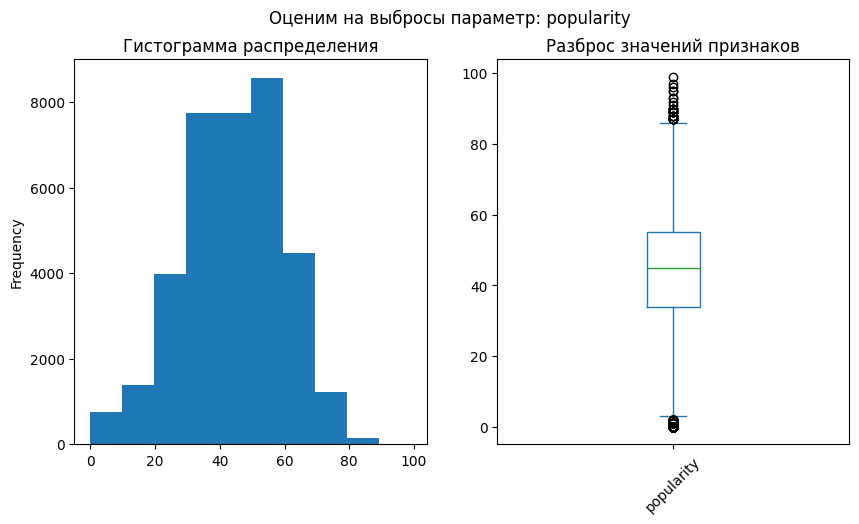

Тестовые данные:
Описание данных в колонке popularity


count   9,002.00
mean       44.53
std        15.39
min         0.00
25%        34.00
50%        45.00
75%        56.00
max        96.00
Name: popularity, dtype: float64

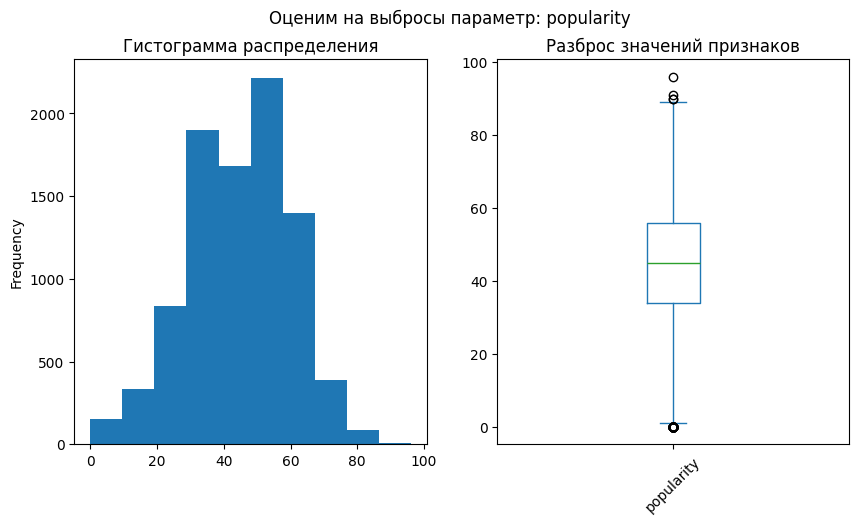

Оценим количественные данные в параметре acousticness
Тренировочные данные:
Описание данных в колонке acousticness


count   40,000.00
mean         0.31
std          0.34
min          0.00
25%          0.02
50%          0.14
75%          0.55
max          1.00
Name: acousticness, dtype: float64

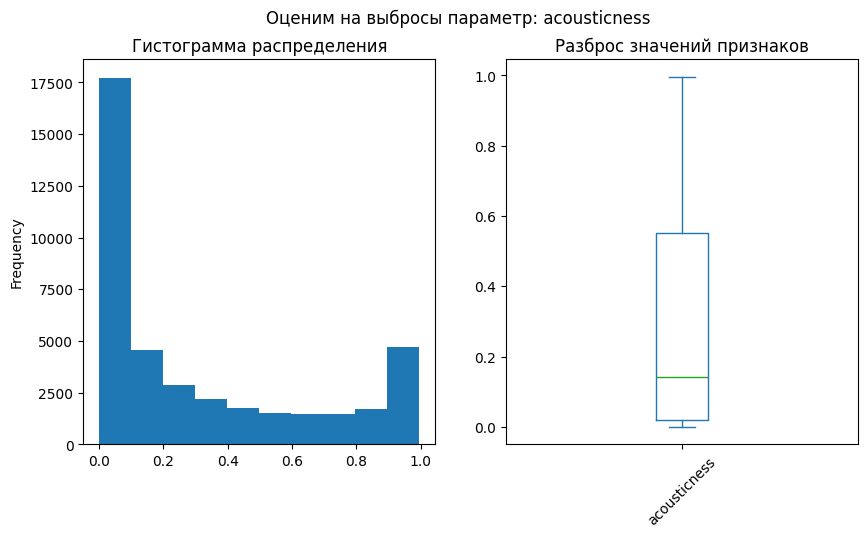

Тестовые данные:
Описание данных в колонке acousticness


count   10,000.00
mean         0.31
std          0.34
min          0.00
25%          0.02
50%          0.15
75%          0.55
max          1.00
Name: acousticness, dtype: float64

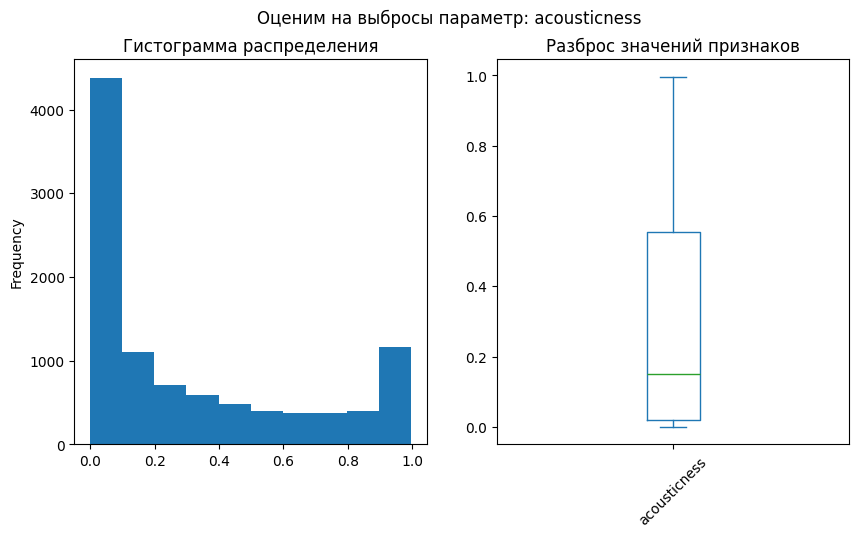

Оценим количественные данные в параметре danceability
Тренировочные данные:
Описание данных в колонке danceability


count   37,954.00
mean         0.56
std          0.18
min          0.06
25%          0.44
50%          0.57
75%          0.69
max          0.99
Name: danceability, dtype: float64

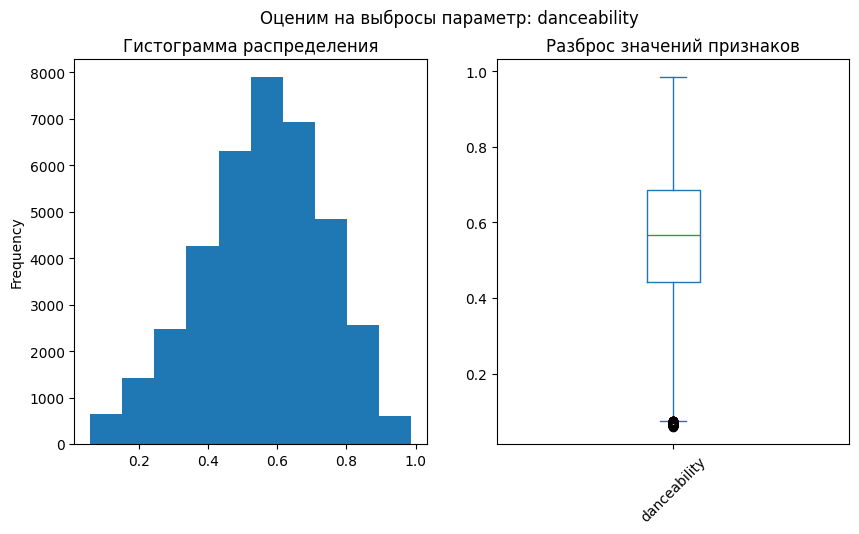

Тестовые данные:
Описание данных в колонке danceability


count   9,486.00
mean        0.56
std         0.18
min         0.06
25%         0.44
50%         0.57
75%         0.69
max         0.98
Name: danceability, dtype: float64

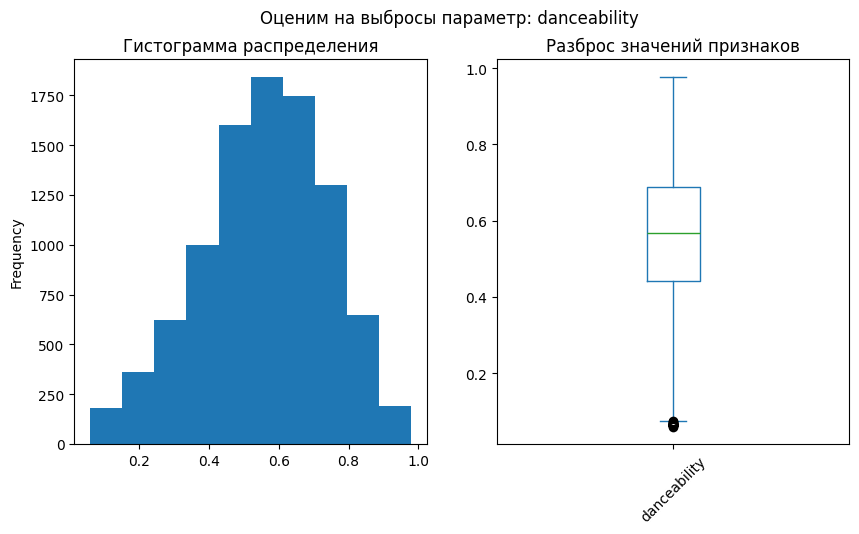

Оценим количественные данные в параметре duration_ms
Тренировочные данные:
Описание данных в колонке duration_ms


count      40,000.00
mean      221,080.78
std       129,611.78
min            -1.00
25%       174,793.75
50%       219,142.00
75%       268,480.00
max     4,830,606.00
Name: duration_ms, dtype: float64

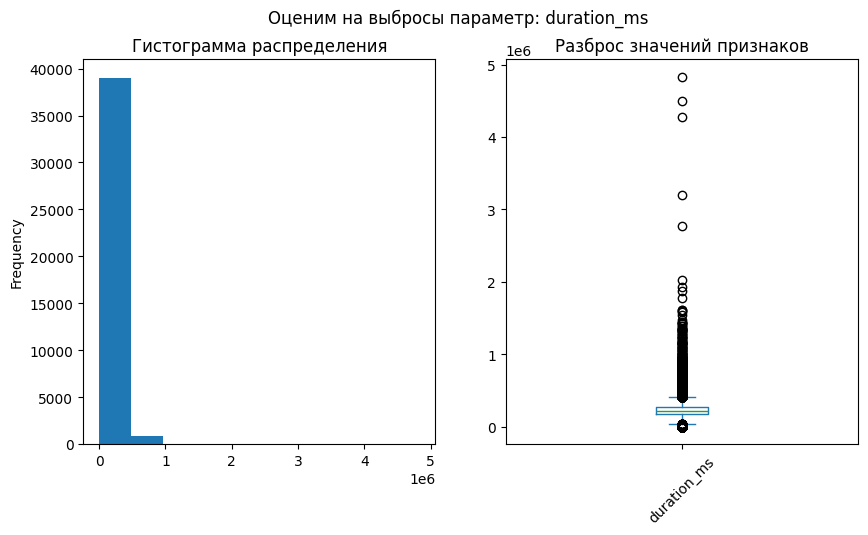

Тестовые данные:
Описание данных в колонке duration_ms


count      10,000.00
mean      221,939.91
std       124,845.90
min            -1.00
25%       174,846.50
50%       220,362.00
75%       268,947.50
max     2,294,000.00
Name: duration_ms, dtype: float64

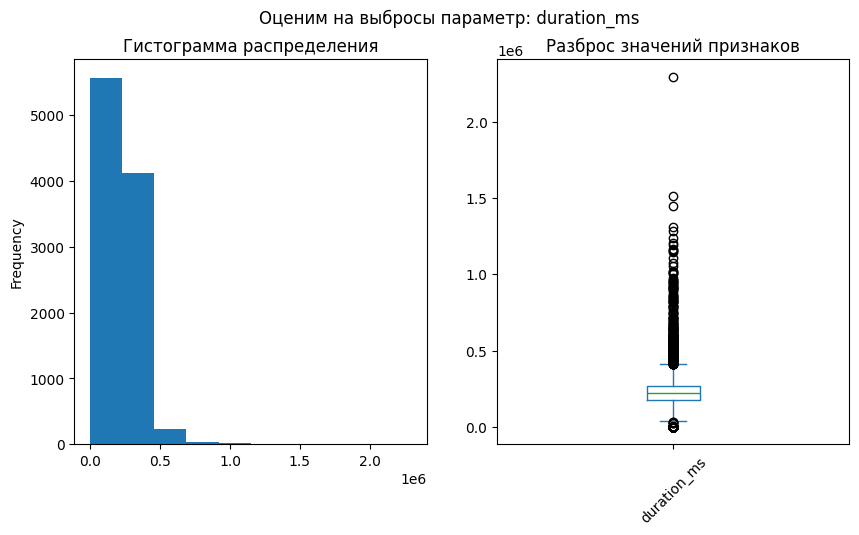

Оценим количественные данные в параметре energy
Тренировочные данные:
Описание данных в колонке energy


count   40,000.00
mean         0.60
std          0.26
min          0.00
25%          0.43
50%          0.64
75%          0.82
max          1.00
Name: energy, dtype: float64

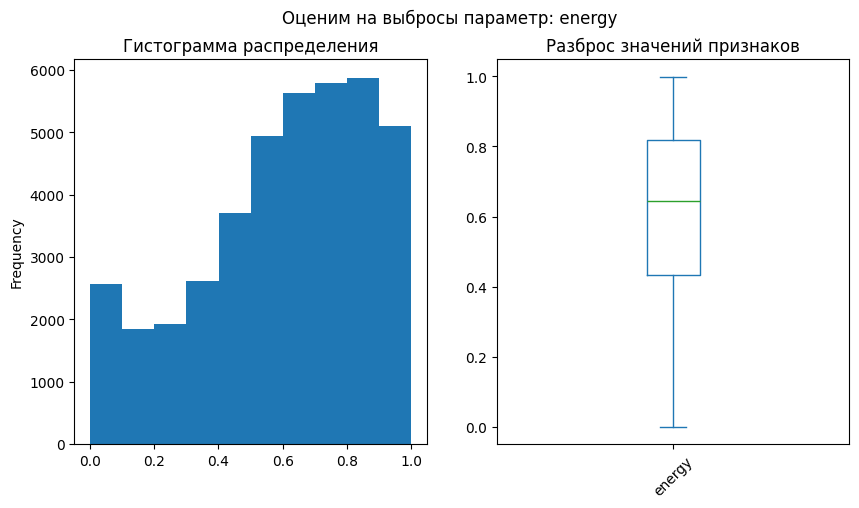

Тестовые данные:
Описание данных в колонке energy


count   10,000.00
mean         0.60
std          0.26
min          0.00
25%          0.43
50%          0.64
75%          0.81
max          1.00
Name: energy, dtype: float64

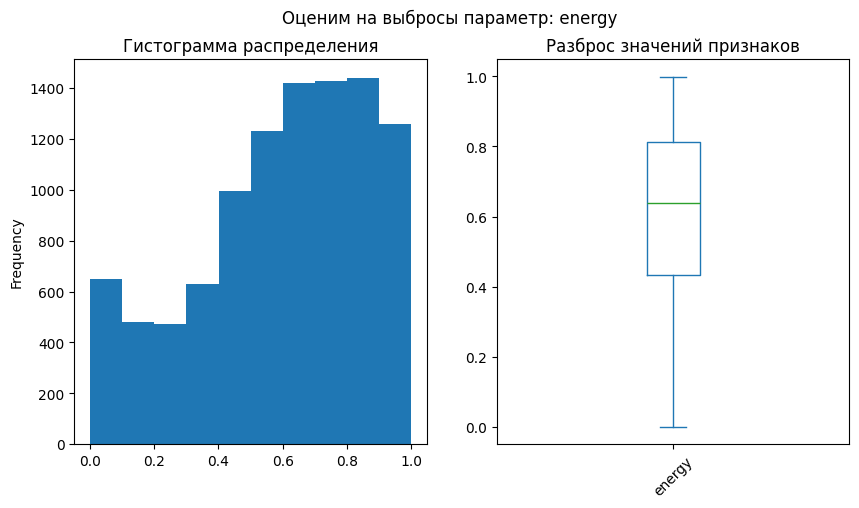

Оценим количественные данные в параметре instrumentalness
Тренировочные данные:
Описание данных в колонке instrumentalness


count   40,000.00
mean         0.18
std          0.33
min          0.00
25%          0.00
50%          0.00
75%          0.15
max          0.99
Name: instrumentalness, dtype: float64

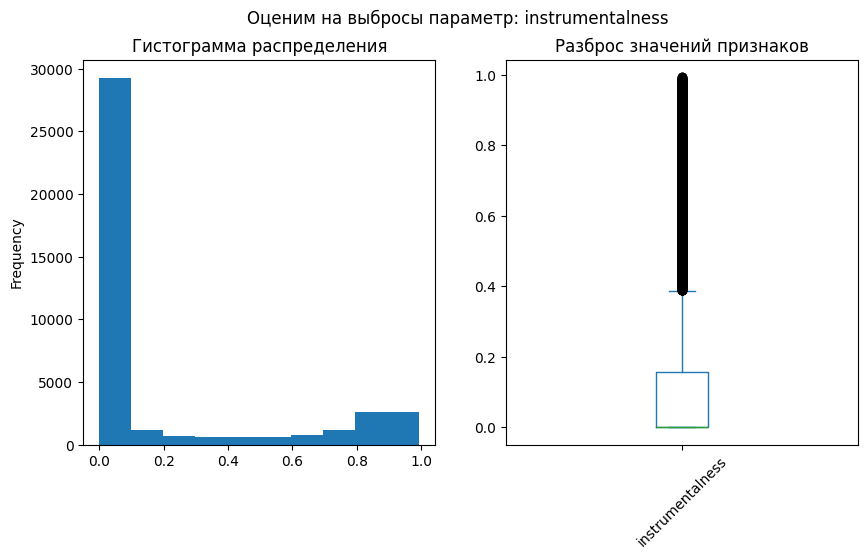

Тестовые данные:
Описание данных в колонке instrumentalness


count   10,000.00
mean         0.18
std          0.33
min          0.00
25%          0.00
50%          0.00
75%          0.15
max          1.00
Name: instrumentalness, dtype: float64

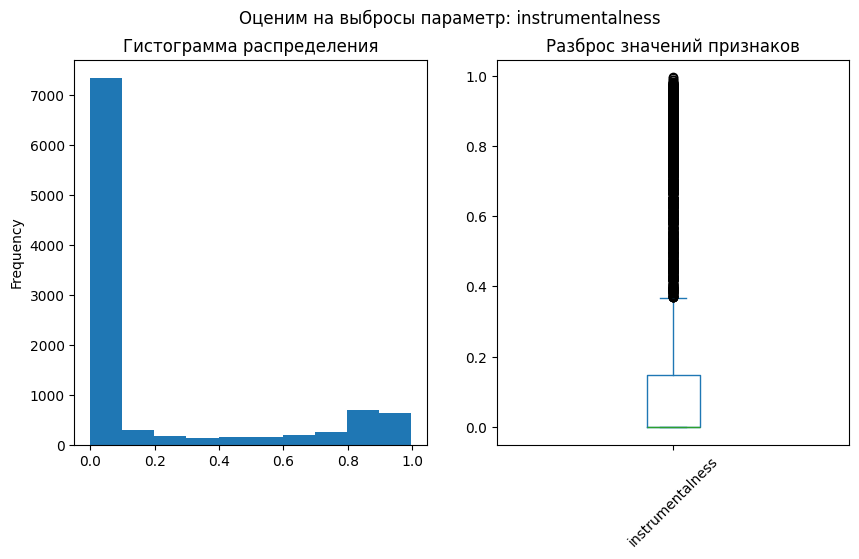

Оценим количественные данные в параметре liveness
Тренировочные данные:
Описание данных в колонке liveness


count   40,000.00
mean         0.19
std          0.16
min          0.01
25%          0.10
50%          0.13
75%          0.24
max          1.00
Name: liveness, dtype: float64

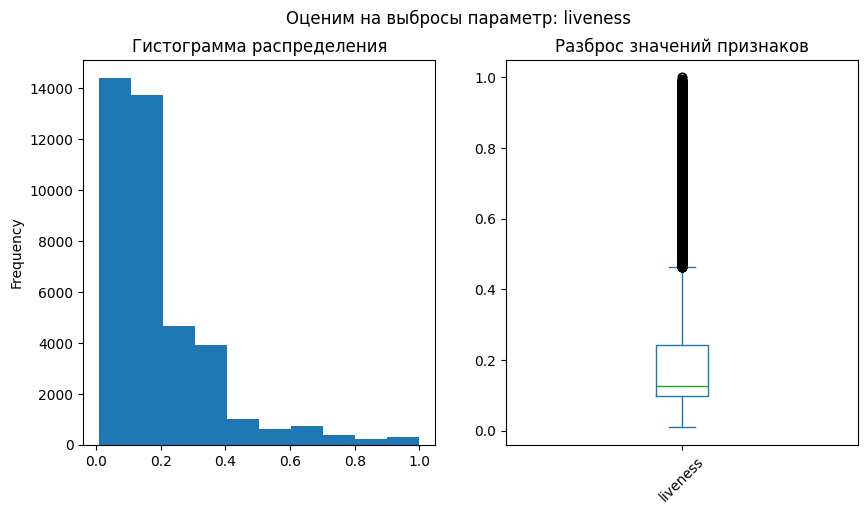

Тестовые данные:
Описание данных в колонке liveness


count   10,000.00
mean         0.19
std          0.16
min          0.01
25%          0.10
50%          0.12
75%          0.24
max          0.99
Name: liveness, dtype: float64

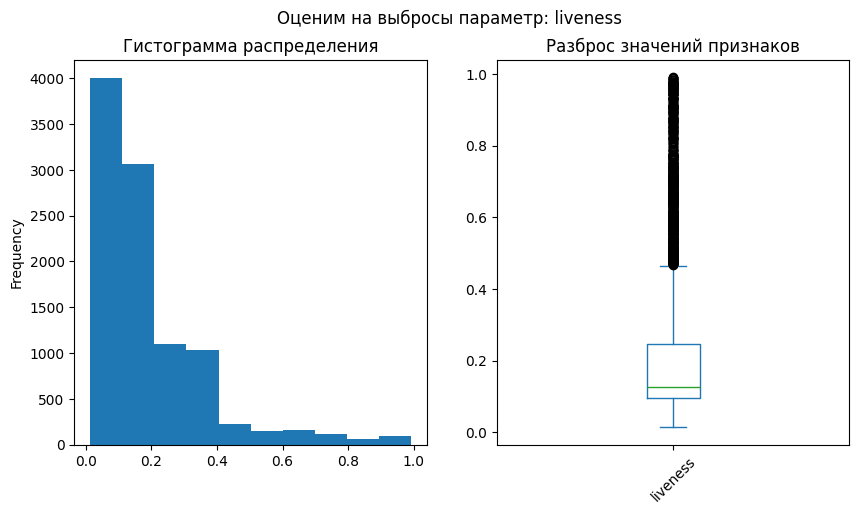

Оценим количественные данные в параметре loudness
Тренировочные данные:
Описание данных в колонке loudness


count   40,000.00
mean       -11.67
std         14.51
min       -108.36
25%        -11.53
50%         -7.46
75%         -5.25
max          1.95
Name: loudness, dtype: float64

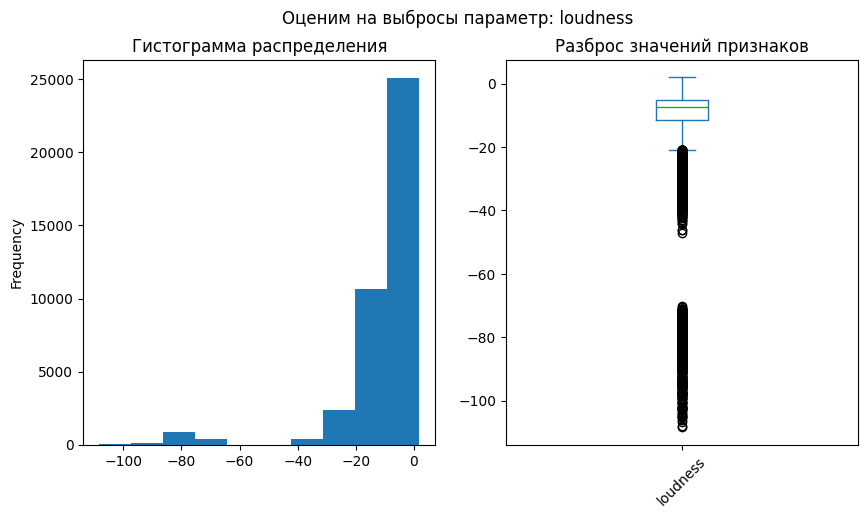

Тестовые данные:
Описание данных в колонке loudness


count   10,000.00
mean       -11.60
std         14.26
min       -104.18
25%        -11.56
50%         -7.48
75%         -5.25
max          3.74
Name: loudness, dtype: float64

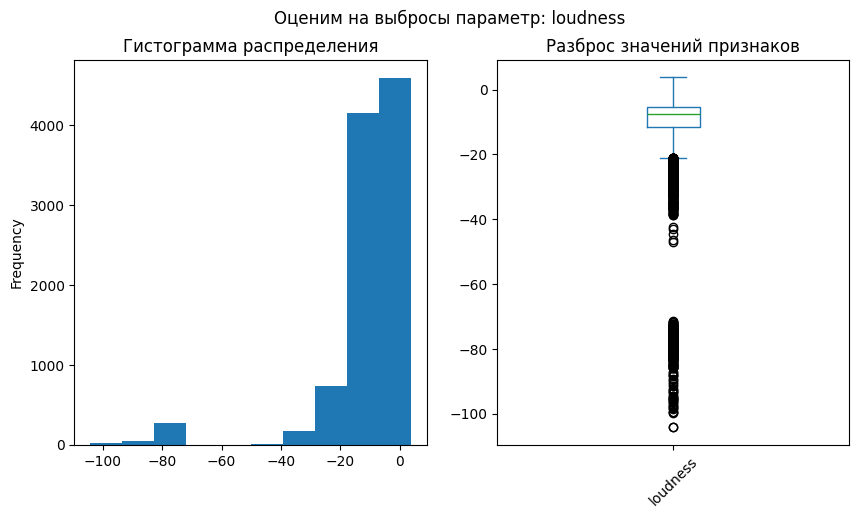

Оценим количественные данные в параметре speechiness
Тренировочные данные:
Описание данных в колонке speechiness


count   40,000.00
mean         0.13
std          0.21
min          0.02
25%          0.04
50%          0.05
75%          0.11
max          1.89
Name: speechiness, dtype: float64

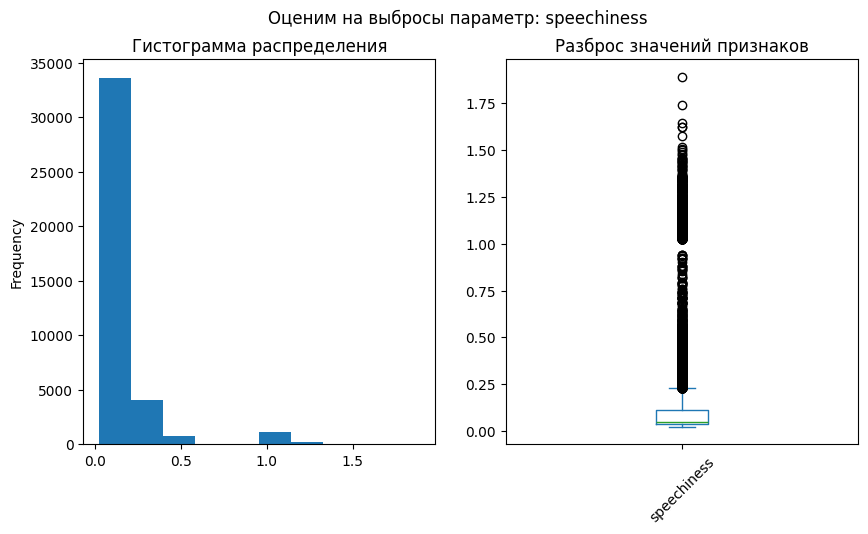

Тестовые данные:
Описание данных в колонке speechiness


count   10,000.00
mean         0.13
std          0.22
min          0.02
25%          0.04
50%          0.05
75%          0.12
max          1.79
Name: speechiness, dtype: float64

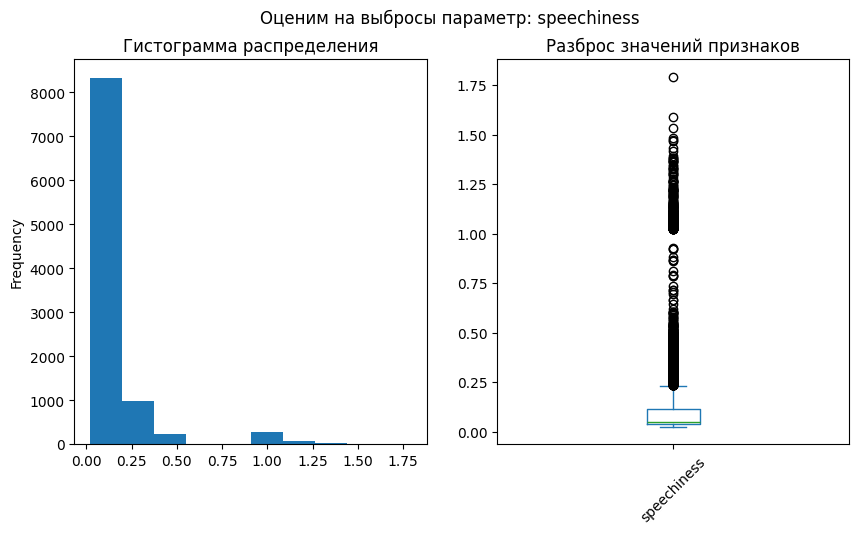

Оценим количественные данные в параметре tempo
Тренировочные данные:
Описание данных в колонке tempo


count   36,004.00
mean       119.93
std         30.64
min         34.47
25%         94.88
50%        119.86
75%        140.41
max        220.28
Name: tempo, dtype: float64

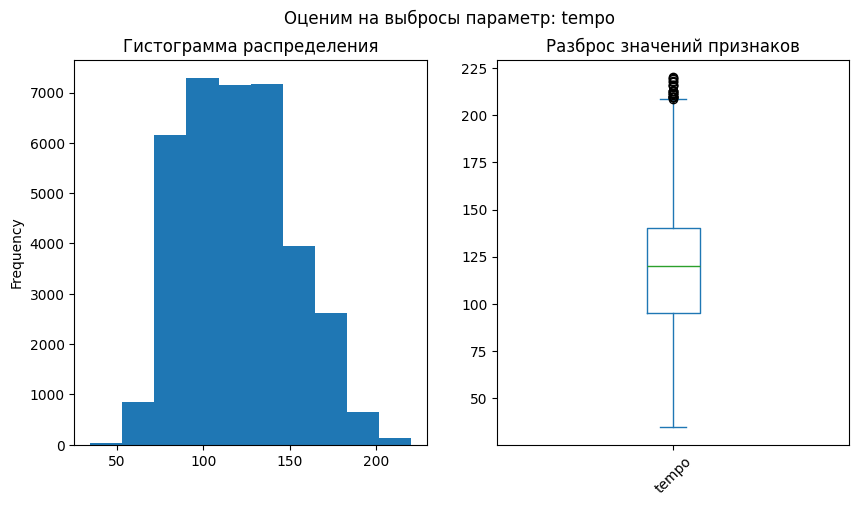

Тестовые данные:
Описание данных в колонке tempo


count   9,016.00
mean      120.03
std        30.65
min        34.35
25%        95.00
50%       119.92
75%       140.62
max       217.93
Name: tempo, dtype: float64

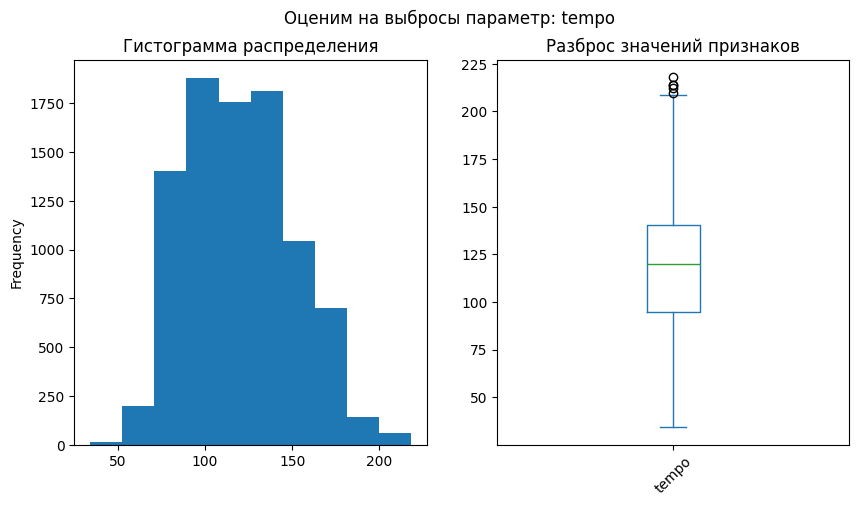

Оценим количественные данные в параметре valence
Тренировочные данные:
Описание данных в колонке valence


count   40,000.00
mean         0.46
std          0.25
min          0.00
25%          0.26
50%          0.45
75%          0.65
max          0.99
Name: valence, dtype: float64

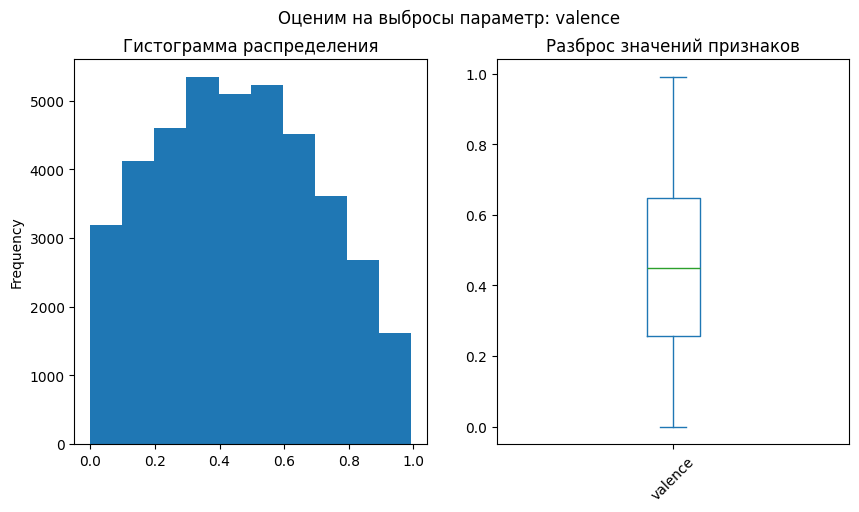

Тестовые данные:
Описание данных в колонке valence


count   10,000.00
mean         0.45
std          0.25
min          0.02
25%          0.26
50%          0.44
75%          0.65
max          0.99
Name: valence, dtype: float64

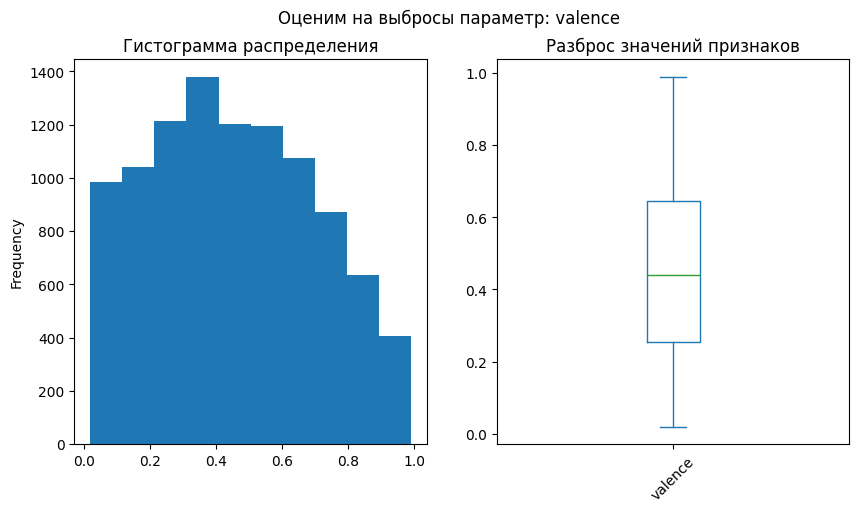

In [15]:
num_col = df.select_dtypes(include=['float', 'int']).columns

for col in num_col[1:]:
    print('Оценим количественные данные в параметре', col)
    print('Тренировочные данные:')
    show_box_hist(df[col])
    print('Тестовые данные:')
    show_box_hist(df_test[col])

#### Выводы по количественным колонкам:

- Распределенны "нормально":
    - valence
    - tempo
    - danceability
    - popularity
- Возможно имеет смысл преобразовать в ранговые значения:
    - speechiness/instrumentalness/acousticness/liveness
- loudness - распрделен ненормлаьным способом с множеством выбросов
- duration_ms - есть треки длинной в 38 минут. Надо проверить на сколько их.
- duration_ms = -1 - отсуствует информация


In [17]:
df.sort_values(by='duration_ms', ascending=False).head(15)

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
31627,40131,Lost Lands 2017 Mix,41.00,0.00,0.47,"4,830,606.00",0.95,0.01,C#,0.41,-1.93,Major,0.30,NaN,4-Apr,0.32,Electronic
14552,3786,Late Night Tales: Bonobo,NaN,0.53,NaN,"4,497,994.00",0.44,0.10,E,0.20,-11.50,Minor,0.16,76.87,4-Apr,0.08,Electronic
38743,14823,Mixtape 13,34.00,0.00,0.37,"4,276,000.00",0.78,0.07,D,0.10,-4.13,Major,0.06,138.29,4-Apr,0.15,Electronic
13287,49472,Rag Bhupali,26.00,0.82,0.27,"3,195,440.00",0.15,0.12,B,0.62,-95.29,Major,0.06,83.63,NaN,0.31,Classical
2557,26075,45:33:00,34.00,0.14,0.48,"2,764,934.00",0.90,0.66,G,0.10,-6.55,Major,0.05,113.02,4-Apr,0.19,Electronic
32396,2793,NaN,33.00,0.12,0.33,"2,019,293.00",0.74,0.70,F#,0.94,-10.47,Minor,0.05,153.04,4-Apr,0.26,Blues
4436,18705,NaN,12.00,0.93,0.26,"1,935,787.00",0.14,0.69,F,0.07,-17.35,Major,0.04,128.17,4-Apr,0.06,Classical
17465,1312,Das Lied von der Erde: 6. Der Abschied,4.00,0.98,0.14,"1,872,653.00",0.06,0.52,F,0.08,-22.03,Major,0.05,80.49,3-Apr,0.03,Classical
14530,45033,NaN,NaN,0.94,0.16,"1,778,440.00",0.35,0.90,A#,0.10,-80.53,Major,0.03,83.87,4-Apr,0.07,Classical
38165,11066,NaN,8.00,0.95,0.08,"1,617,333.00",0.12,0.74,D,0.71,-17.92,Major,0.04,56.85,4-Apr,0.04,Classical


Длинные мелодии это классические или электоронные композиции - важный показатель для их определения. 

### Анализ категориаьных данных

In [16]:
# Оценим категориальные данные
def cat_col_pie(col):
    """
    Функция которая строит круговую и столбиковую диаграммы для количественного параметра
    """
    print('Кол-во значение в колонке {}'.format(col.name))
    display(col.value_counts(normalize=True))
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
    fig.suptitle('Оценим доли по значениям в категориальных параметрах: {}'.format(col.name))
    col.value_counts().plot(kind='pie', ax=axes[0], y=col.name, autopct="%.1f%%")
    axes[0].set_title('Доли по категориям')
    col.value_counts().sort_values(ascending=True).plot(kind='barh', ax=axes[1], rot=0)
    axes[1].set_title('Количество в группах')
    plt.tight_layout() #автоподбор отступов между графикамиа
    plt.show()

Кол-во значение в колонке key


key
G    0.12
C    0.11
C#   0.11
D    0.11
A    0.10
F    0.08
B    0.07
E    0.07
A#   0.07
G#   0.07
F#   0.06
D#   0.03
Name: proportion, dtype: float64

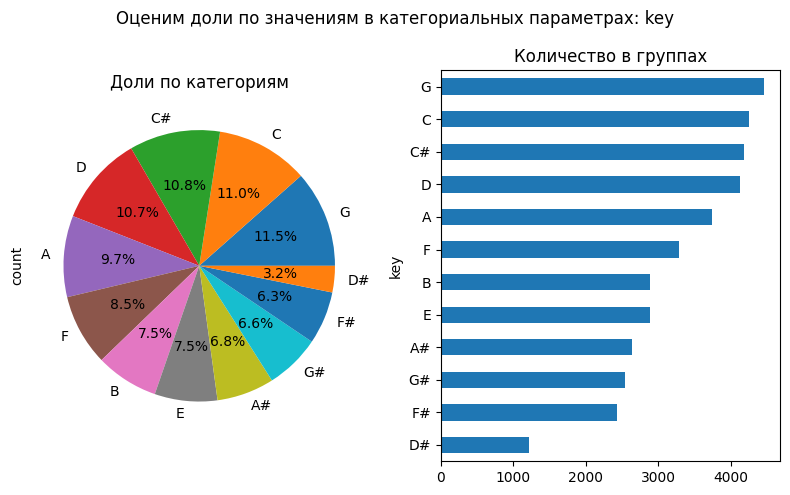

Кол-во значение в колонке mode


mode
Major   0.64
Minor   0.36
Name: proportion, dtype: float64

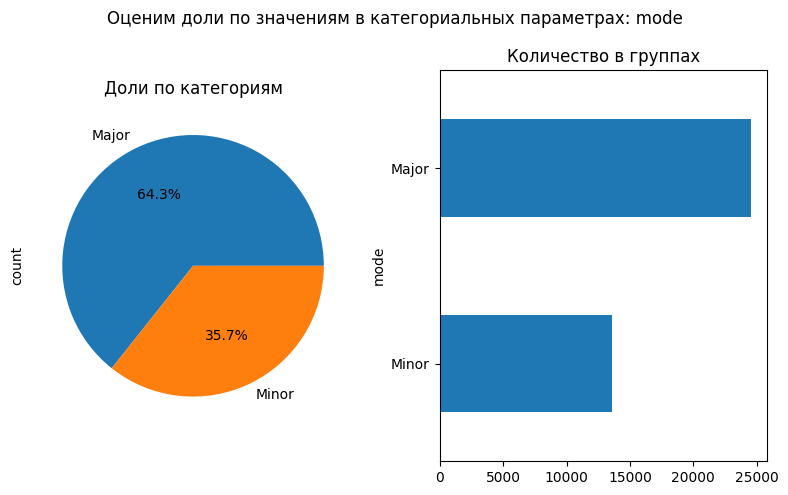

Кол-во значение в колонке music_genre


music_genre
Alternative   0.10
Jazz          0.10
Electronic    0.10
Anime         0.10
Blues         0.10
Country       0.10
Rap           0.10
Classical     0.10
Rock          0.10
Hip-Hop       0.10
Name: proportion, dtype: float64

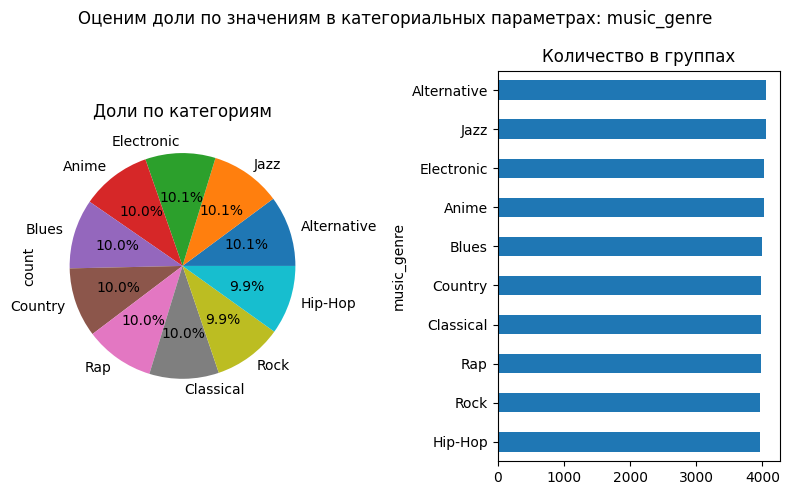

In [17]:
# оценим тренировочную выборку
cat_col = ['key', 'mode', 'music_genre']

for col in cat_col:
    cat_col_pie(df[col])

Кол-во значение в колонке key


key
C    0.11
G    0.11
C#   0.11
D    0.10
A    0.09
F    0.09
B    0.08
E    0.08
G#   0.07
A#   0.06
F#   0.06
D#   0.03
Name: proportion, dtype: float64

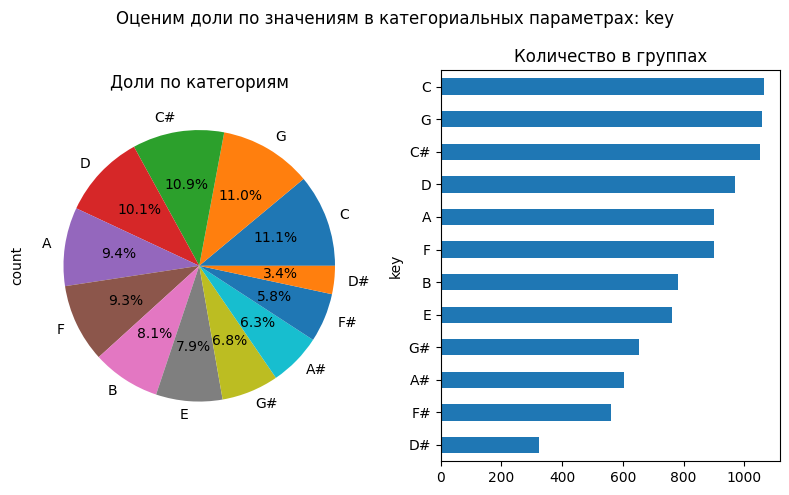

Кол-во значение в колонке mode


mode
Major   0.64
Minor   0.36
Name: proportion, dtype: float64

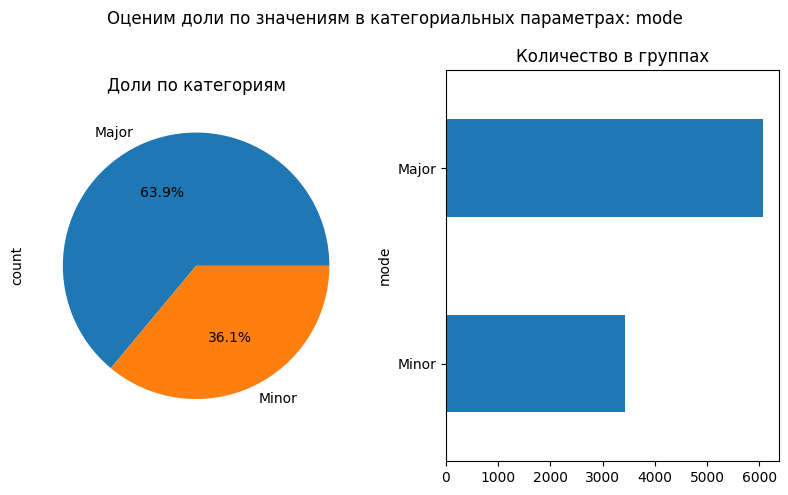

In [18]:
# оценим тестовую выборку

cat_col = ['key', 'mode']

for col in cat_col:
    cat_col_pie(df_test[col])

По категорильным колонкам близки тестовая и тренировочная выборки.

# Добавление фич

In [19]:
# в названии только буквы из алфавита
df['isalpha'] = df['track_name'].str.isalpha()
df_test['isalpha'] = df_test['track_name'].str.isalpha()
# кол-во слов в названии
df['count_words'] = df['track_name'].str.count(' ') + 1
df_test['count_words'] = df_test['track_name'].str.count(' ') + 1
# длинна названия
df['track_name_length'] = df['track_name'].str.len()
df_test['track_name_length'] = df_test['track_name'].str.len()
df_test['track_name_length']

0      12.00
1      14.00
2        NaN
3      27.00
4      20.00
        ... 
9995    7.00
9996   23.00
9997   21.00
9998    9.00
9999   12.00
Name: track_name_length, Length: 10000, dtype: float64

In [22]:
# наличие иероглифов в названии
pattern = re.compile(r'([\p{IsHan}\p{IsBopo}\p{IsHira}\p{IsKatakana}]+)', re.UNICODE)

def is_cjs(track):
    if  not isinstance(track, str):
        return 'no Chinese or Japanese Characters' 
    elif pattern.search(track) is None:
        return 'no Chinese or Japanese Characters'
    else:
        return 'has Chinese or Japanese Characters'


df['chinese_japanese'] = df['track_name'].apply(is_cjs)
df_test['chinese_japanese'] = df_test['track_name'].apply(is_cjs)

In [23]:
# - speechiness - Речевой характер определяет наличие в треке разговорной речи. Чем более исключительно речевой характер 
# носит запись (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1,0. 
# начения выше 0,66 характеризуют треки, которые, вероятно, полностью состоят из разговорной речи. 
# Значения от 0,33 до 0,66 характеризуют треки, которые могут содержать как музыку, так и речь, 
# как в виде фрагментов, так и в виде слоев, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки.
def speech_category(val):
    if val > 0.66:
        return 'high'
    elif val > 0.33:
        return 'medium'
    else:
        return 'low' 

df['speech_cat'] = df['speechiness'].apply(speech_category)
df_test['speech_cat'] = df_test['speechiness'].apply(speech_category)

<Axes: ylabel='acoustic_cat'>

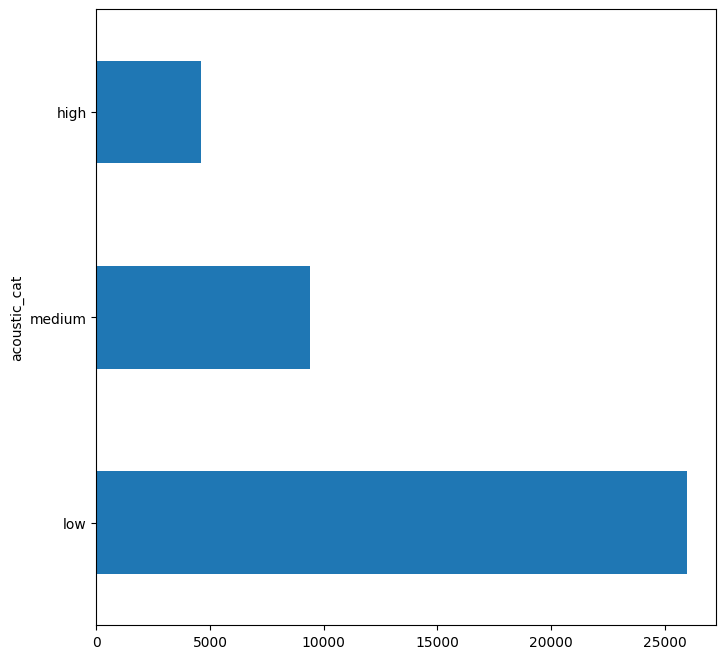

In [24]:
#  acousticness - Мера уверенности от 0,0 до 1,0 в том, что трек является акустическим. 
# 1,0 означает высокую степень уверенности в том, что трек является акустическим.
def acoustic_category(val):
    if val > 0.9:
        return 'high'
    elif val > 0.33:
        return 'medium'
    else:
        return 'low' 

df['acoustic_cat'] = df['acousticness'].apply(acoustic_category)
df_test['acoustic_cat'] = df_test['acousticness'].apply(acoustic_category)
df['acoustic_cat'].value_counts().plot(kind='barh')

<Axes: ylabel='instrum_cat'>

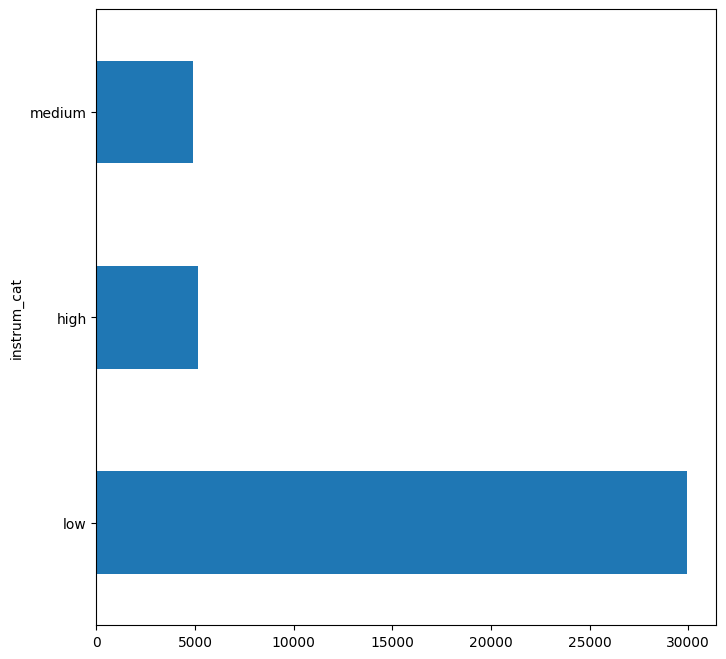

In [25]:
# - instrumentalness - Определяет, содержит ли трек вокал. Звуки "Ooh" и "aah" в данном контексте рассматриваются как инструментальные. 
# Рэп или разговорные треки явно являются "вокальными".
# Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокала

def instrum_category(val):
    if val > 0.8:
        return 'high'
    elif val > 0.15:
        return 'medium'
    else:
        return 'low' 

df['instrum_cat'] = df['instrumentalness'].apply(instrum_category)
df_test['instrum_cat'] = df_test['instrumentalness'].apply(instrum_category)
df['instrum_cat'].value_counts().plot(kind='barh')

<Axes: ylabel='long_track'>

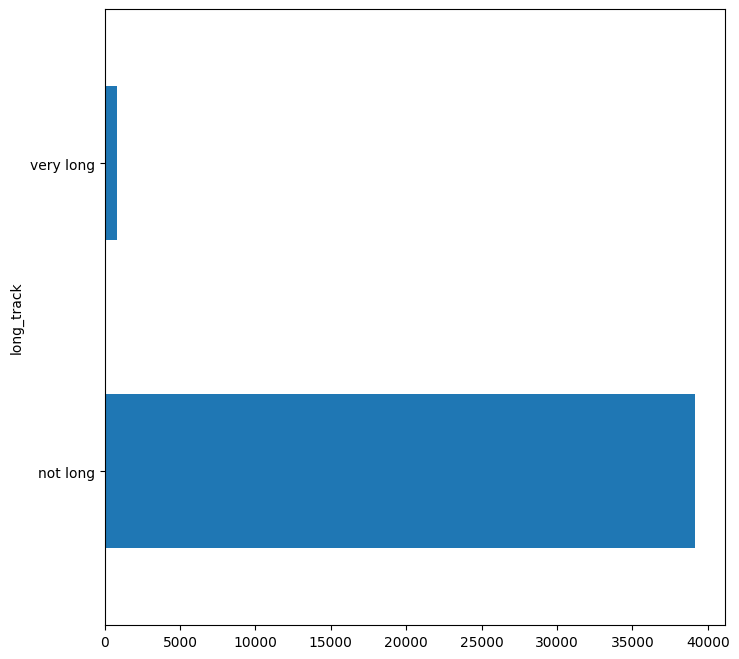

In [26]:
# выделим длиные треки - вероятно указывают на классику и на трек для релаксации/медитации
def duration_long(val):
    if val > 500_000:
        return 'very long'
    else:
        return 'not long' 

df['long_track'] = df['duration_ms'].apply(duration_long)
df_test['long_track'] = df_test['duration_ms'].apply(duration_long)
df['long_track'].value_counts().plot(kind='barh')

# Обработка пропущенных значений

In [ ]:
print('Пропущенных значений в duration_ms:', len(df.loc[(df['duration_ms'] == -1), ]))

In [27]:
# заполняем пропуски в duration_ms - медианой внтури жанра
try:
    for i in df['music_genre'].unique():
        df.loc[(df['music_genre'] == i) & (df['duration_ms'] == -1), 'duration_ms']\
        = df.loc[(df['music_genre'] == i), 'duration_ms'].median()
except:
    pass

df_test.loc[(df_test['duration_ms'] == -1), 'duration_ms'] = df_test['duration_ms'].median()

In [28]:
df_test['duration_ms'].describe()

count      10,000.00
mean      243,667.70
std       101,278.33
min        24,000.00
25%       194,396.75
50%       220,363.00
75%       268,947.50
max     2,294,000.00
Name: duration_ms, dtype: float64

In [26]:
df.columns

Index(['instance_id', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'obtained_date',
       'valence', 'music_genre'],
      dtype='object')

# Проверка на мультиколлинеарность

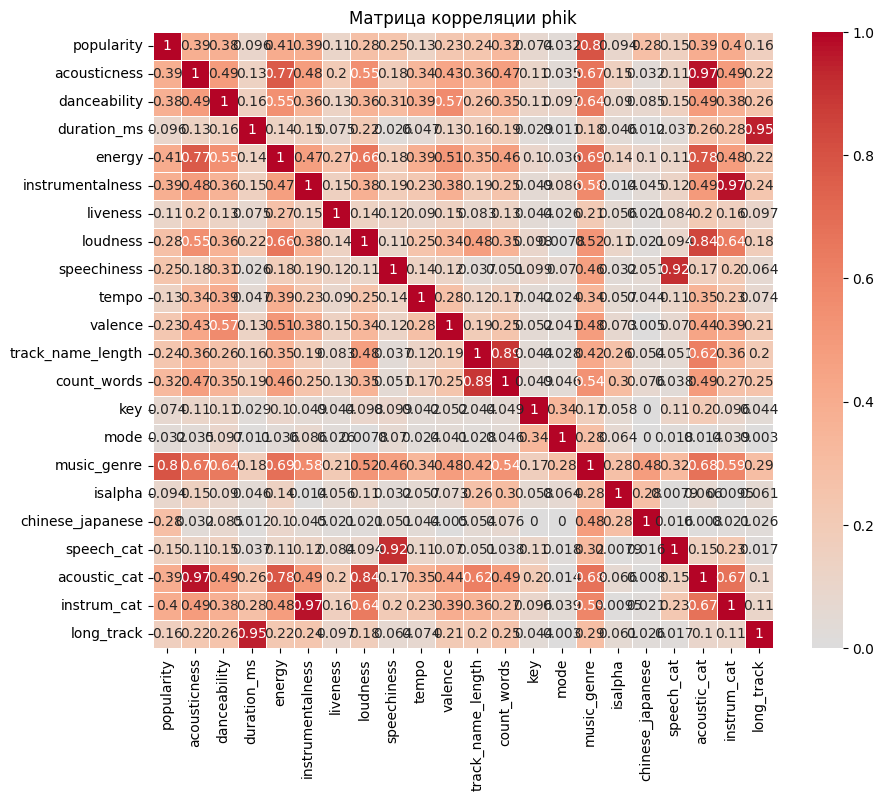

In [30]:
intrvl_col = ['popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness'
       ,'liveness', 'loudness', 'speechiness', 'tempo','valence', 'track_name_length', 'count_words']

cat_col = ['key', 'mode', 'music_genre', 'isalpha', 'chinese_japanese', 'speech_cat', 'acoustic_cat', 'instrum_cat', 'long_track']

fig, ax = plt.subplots(figsize=(10,8))         
ax = sns.heatmap(df[intrvl_col + cat_col].phik_matrix(interval_cols = intrvl_col), 
                 cmap='coolwarm', center=0, annot=True, linewidth=.5, ax=ax).set_title('Матрица корреляции phik')

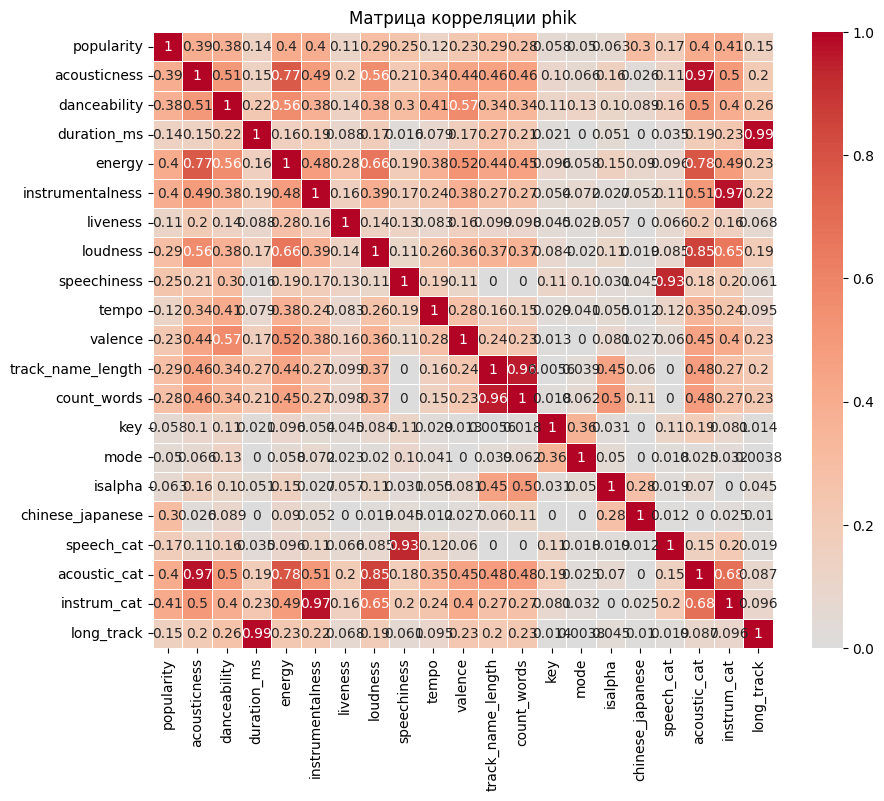

In [31]:
cat_col = ['key', 'mode', 'isalpha', 'chinese_japanese', 'speech_cat', 'acoustic_cat', 'instrum_cat', 'long_track']

fig, ax = plt.subplots(figsize=(10,8))         
ax = sns.heatmap(df_test[intrvl_col + cat_col].phik_matrix(interval_cols = intrvl_col), 
                 cmap='coolwarm', center=0, annot=True, linewidth=.5, ax=ax).set_title('Матрица корреляции phik')

Выводы: 
новые категориальные колонки сильно коррелируют со своими исходыными, особен duration_ms и long_track, протетсируем и с ними и без них модели

# Подготовка данных - Pipelines

In [32]:
RANDOM_STATE = 42 #это ведь потому что это ответ на вопрос жизни, вселенной и всего такого

In [33]:
# создаём списки с названиями признаков
ohe_columns = ['key', 'mode', 'isalpha', 'chinese_japanese']
ord_columns = ['speech_cat', 'acoustic_cat', 'instrum_cat'] 
num_columns = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 
               'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'track_name_length', 'count_words']

In [34]:
Xy = df[['music_genre'] + ohe_columns + ord_columns + num_columns].copy()
X_test = df_test[ohe_columns + ord_columns + num_columns].copy()
df_uni_describe(Xy)

Main info:
Number of variables: 21
Number of observations: 40000
Total missing: 5.38%
Total duplicates: 0
Missing (NaNs), %


,"NaNs, %"
count_words,26.69
track_name_length,26.69
isalpha,26.69
tempo,9.99
popularity,9.84
danceability,5.12
mode,4.57
key,3.44
acoustic_cat,0.00
instrum_cat,0.00


Info of dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   music_genre        40000 non-null  object 
 1   key                38624 non-null  object 
 2   mode               38174 non-null  object 
 3   isalpha            29324 non-null  object 
 4   chinese_japanese   40000 non-null  object 
 5   speech_cat         40000 non-null  object 
 6   acoustic_cat       40000 non-null  object 
 7   instrum_cat        40000 non-null  object 
 8   popularity         36063 non-null  float64
 9   acousticness       40000 non-null  float64
 10  danceability       37954 non-null  float64
 11  duration_ms        40000 non-null  float64
 12  energy             40000 non-null  float64
 13  instrumentalness   40000 non-null  float64
 14  liveness           40000 non-null  float64
 15  loudness           40000 non-null  float64
 16  spe

None

Head of dataframe:


,music_genre,key,mode,isalpha,chinese_japanese,speech_cat,acoustic_cat,instrum_cat,popularity,acousticness,...,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,track_name_length,count_words
0,Country,F#,Minor,NaN,no Chinese or Japanese Characters,low,low,low,38.00,0.05,...,"152,427.00",0.64,0.02,0.11,-9.11,0.06,167.36,0.60,NaN,NaN
1,Rap,C#,Major,False,no Chinese or Japanese Characters,low,low,low,67.00,0.05,...,"207,403.50",0.46,0.00,0.18,-15.03,0.28,140.18,0.20,15.00,2.00


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,track_name_length,count_words
count,"36,063.00","40,000.00","37,954.00","40,000.00","40,000.00","40,000.00","40,000.00","40,000.00","40,000.00","36,004.00","40,000.00","29,324.00","29,324.00"
mean,44.13,0.31,0.56,"243,092.57",0.60,0.18,0.19,-11.67,0.13,119.93,0.46,20.23,3.79
std,15.56,0.34,0.18,"107,235.17",0.26,0.33,0.16,14.51,0.21,30.64,0.25,17.20,3.18
min,0.00,0.00,0.06,"15,509.00",0.00,0.00,0.01,-108.36,0.02,34.47,0.00,1.00,1.00
25%,34.00,0.02,0.44,"195,040.75",0.43,0.00,0.10,-11.53,0.04,94.88,0.26,10.00,2.00
50%,45.00,0.14,0.57,"225,573.00",0.64,0.00,0.13,-7.46,0.05,119.86,0.45,15.00,3.00
75%,55.00,0.55,0.69,"268,480.00",0.82,0.15,0.24,-5.25,0.11,140.41,0.65,25.00,5.00
max,99.00,1.00,0.99,"4,830,606.00",1.00,0.99,1.00,1.95,1.89,220.28,0.99,242.00,44.00


In [35]:
X_train = Xy.drop(['music_genre'], axis=1)
y_train = Xy['music_genre']

# закодируем признак
le = LabelEncoder()
le.fit(y_train)

le.classes_

array(['Alternative', 'Anime', 'Blues', 'Classical', 'Country',
       'Electronic', 'Hip-Hop', 'Jazz', 'Rap', 'Rock'], dtype=object)

## Pipeline для предобработки данных

In [41]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)),
     ('simpleImputer_after_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['low', 'medium', 'high'],
                    ['low', 'medium', 'high'],
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

numerical_transformer = SimpleImputer(missing_values=np.nan, strategy='median')

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', numerical_transformer, num_columns),
    #  ('num_scale', RobustScaler(), num_columns)
    ], 
    remainder='passthrough'
)
# data_preprocessor_scaler = ColumnTransformer(
#     [
#      ('num_scale', RobustScaler(), num_columns)
#     ], 
#     remainder='passthrough'
# )


# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    # ('scaler', data_preprocessor_scaler),
    ('models', GradientBoostingClassifier(max_depth=5, n_estimators=140,
                                       min_samples_split=7, random_state=RANDOM_STATE))
])

print(pipe_final)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('simpleImputer_after_ohe',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['key', 'mode', 'is

## список гиперпараметров моделей для перебора 

In [37]:
# сделаем список гиперпарамеров моделей для перебора 
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 7),
        'models__max_features': range(1, 20),
        'models__min_samples_split': range(1, 10)
        # 'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
        # словарь для модели GradientBoostingClassifier()
    {
        'models': [GradientBoostingClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': range(50, 500),
        'models__max_depth': range(2, 20),
        'models__min_samples_split': range(2, 10)
        # 'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors' : range(2, 10)
        # 'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(),  'passthrough']   
    },

    # словарь для модели RandomForestClassifier()
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 20),
        'models__max_features': range(1, 20),
        'models__min_samples_split': range(1, 10)
        # 'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    # словарь для SVC()
    {
        'models': [SVC(
            random_state=RANDOM_STATE, 
            kernel = 'poly', 
            degree = 2
        )],
        'models__C': [0.1,1,10]
        # 'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }  
]

# Поиск оптимальной модели

In [40]:
# сделаем перебор гиперпаратеров через RandomizedSearchCV
start_time = time.time()
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='f1_micro',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

/home/leonid/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/leonid/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/leonid/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/leonid/.local/lib/python3.10/

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('simpleImputer_after_ohe',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                     

# Оценка модели и интерпретация

In [64]:
y_pred = randomized_search.predict(X_train)
y_pred_prob = randomized_search.predict_proba(X_train)
print(f"Метрика F1_Micro на тренировочной выборке: {f1_score(y_train, y_pred, average='weighted')}")


Метрика F1_Micro на тестовой выборке: 0.7825617700367504


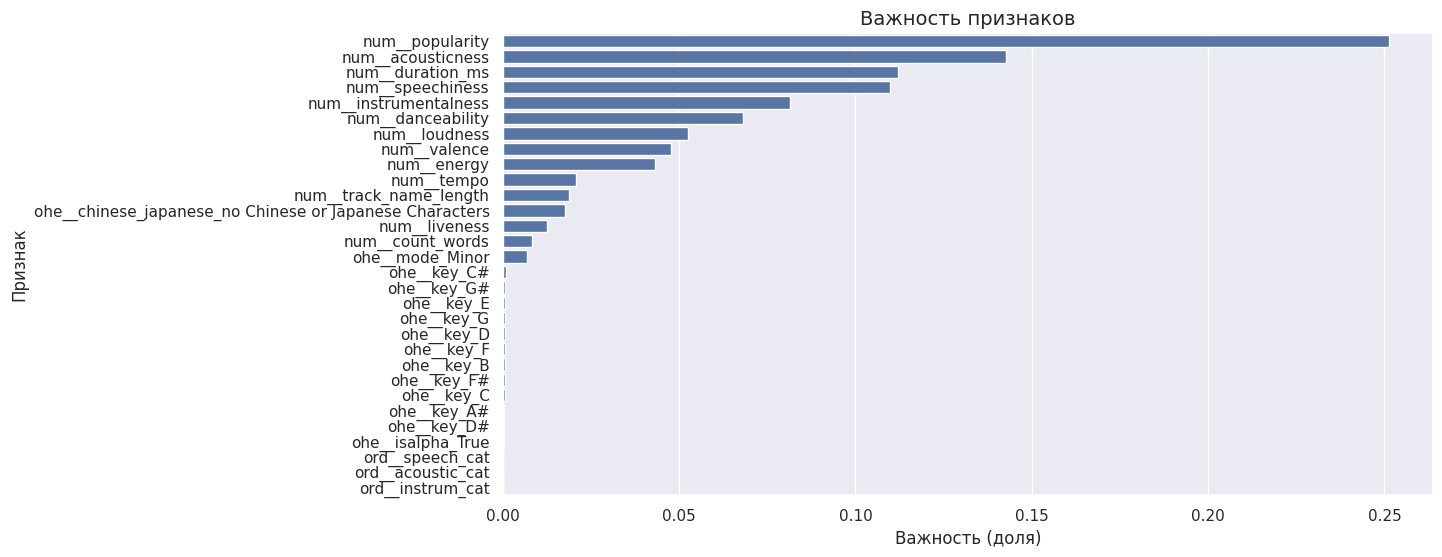

In [113]:
pipe_final.fit(X_train, y_train)
feature_names = pipe_final[:-1].get_feature_names_out()
feature_imp_best_est = randomized_search.best_estimator_.named_steps["models"].feature_importances_
# print('Importance', feature_imp_best_est)
# print('Feature', feature_names)

feature_importances = pd.DataFrame(
    {
        'Feature': feature_names,
        'Importance': feature_imp_best_est
    }).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=feature_importances, x='Importance', y='Feature')

# добавляем названия графика и осей
ax.set_title('Важность признаков', fontsize=14)
ax.set_xlabel('Важность (доля)', fontsize=12)
ax.set_ylabel('Признак', fontsize=12)

# отображаем график
plt.show()

In [91]:
# в табличном виде
feature_importances.head(20)

,Feature,Importance
17,num__popularity,0.25
18,num__acousticness,0.14
20,num__duration_ms,0.11
25,num__speechiness,0.11
22,num__instrumentalness,0.08
19,num__danceability,0.07
24,num__loudness,0.05
27,num__valence,0.05
21,num__energy,0.04
26,num__tempo,0.02


### Оценка важности фич
Категориальные колонки не важны в классификации, из новых признаков важны:
 - track_name_length
 - japanese_no Chinese or Japanese
 - count_words

Максимальное знаечние у признаков:
- popularity
- acousticness	
- duration_ms
- speechiness	

[Text(0, 0.5, 'Alternative'),
 Text(0, 1.5, 'Anime'),
 Text(0, 2.5, 'Blues'),
 Text(0, 3.5, 'Classical'),
 Text(0, 4.5, 'Country'),
 Text(0, 5.5, 'Electronic'),
 Text(0, 6.5, 'Hip-Hop'),
 Text(0, 7.5, 'Jazz'),
 Text(0, 8.5, 'Rap'),
 Text(0, 9.5, 'Rock')]

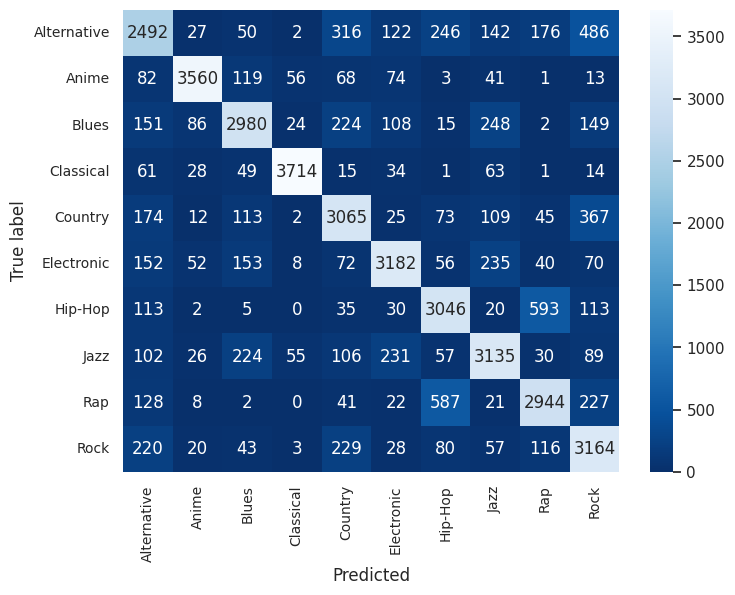

In [82]:
# построим матрицу ошибок
sns.set(rc={'figure.figsize':(8,6)})

cm = confusion_matrix(y_train, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
ax.set_xticklabels(le.classes_, rotation=90, size=10) 
ax.set_yticklabels(le.classes_, rotation=0, size=10) 


### Вывод по матрице ошибок
Модель путает между собой 
- Alternative и Rock
- Hip-Hop и  Rap
- Country и Rock

Самый сложный жанр Alternative - его представителей модель относит как Country и Rock и Hip-Hop

In [93]:
y_test_pred = randomized_search.predict(X_test)
y_test_pred_prob = randomized_search.predict_proba(X_test)
len(y_test_pred)

10000

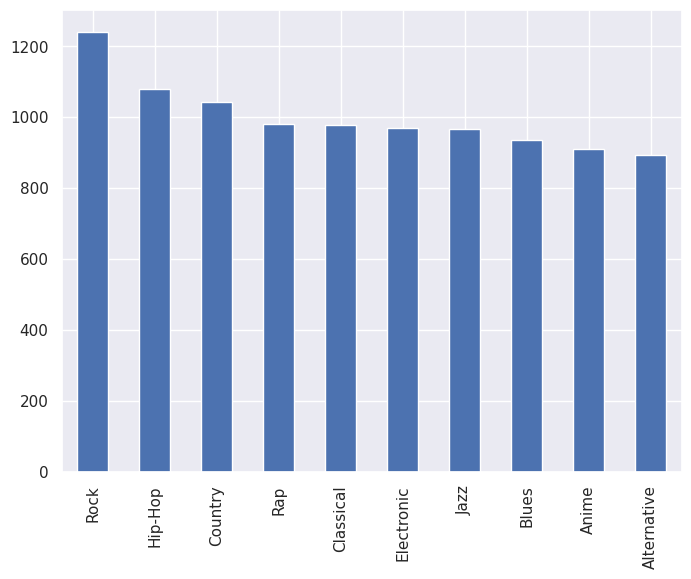

In [105]:
ax = pd.Series(y_test_pred).value_counts().plot(kind="bar")

### Вывод по распределению
Если предположить что тестовые данные распределены равномерно, то выбранная модель отдает предпочтение Rock и Hip-Hop против Alternative и Anime

In [109]:
df_test['music_genre'] = y_test_pred
df_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instance_id,"10,000.00",NaN,NaN,NaN,"25,797.03","14,402.40","1,012.00","13,238.50","25,704.50","38,237.00","50,988.00"
track_name,7326,7078,Paradise,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
popularity,"9,002.00",NaN,NaN,NaN,44.53,15.39,0.00,34.00,45.00,56.00,96.00
acousticness,"10,000.00",NaN,NaN,NaN,0.31,0.34,0.00,0.02,0.15,0.55,1.00
danceability,"9,486.00",NaN,NaN,NaN,0.56,0.18,0.06,0.44,0.57,0.69,0.98
duration_ms,"10,000.00",NaN,NaN,NaN,"243,667.70","101,278.33","24,000.00","194,396.75","220,363.00","268,947.50","2,294,000.00"
energy,"10,000.00",NaN,NaN,NaN,0.60,0.26,0.00,0.43,0.64,0.81,1.00
instrumentalness,"10,000.00",NaN,NaN,NaN,0.18,0.33,0.00,0.00,0.00,0.15,1.00
key,9626,12,C,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liveness,"10,000.00",NaN,NaN,NaN,0.19,0.16,0.01,0.10,0.12,0.24,0.99


In [111]:
df_sample = df_test[['instance_id', 'music_genre']]
df_sample.head()

,instance_id,music_genre
0,32911,Anime
1,30681,Country
2,9640,Rock
3,40204,Rock
4,11034,Rap


In [118]:
df_sample.to_csv('./result/first_submit.csv', index=False)

In [119]:
submit = pd.read_csv('./result/first_submit.csv')
submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instance_id  10000 non-null  int64 
 1   music_genre  10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


# Выводы по исследованию

### Задача

Вы сотрудник Отдела Data Science популярного музыкального стримингового сервиса "МиФаСоль". Сервис расширяет работу с новыми артистами и музыкантами,
в связи с чем возникла задача - правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. Ваши коллеги из отдела работы со звуком подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. Ваша задача - разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.

Всего у нас 10 жанров: 'Alternative', 'Anime', 'Blues', 'Classical', 'Country',
       'Electronic', 'Hip-Hop', 'Jazz', 'Rap', 'Rock'


### Исходные данные и предобработка

Полных дублей нет 

- пропуски (NaNs, %):
    - track_name	26.69
    - obtained_date	15.66
    - popularity	9.84
    - danceability	5.12
    - mode	4.57
    - key	3.44
- tempo - поравили тип, так как были не цифровые данные

Провели EDA 
- Распределенны "нормально":
    - valence
    - tempo
    - danceability
    - popularity
- Следующие данные сильно лкстеризованы и имеют явные группы:
    - speechiness/instrumentalness/acousticness/liveness
- loudness - распрделен ненормлаьным способом с множеством выбросов
- duration_ms - есть треки длинной в 38 минут. Надо проверить на сколько их.
- duration_ms = -1 - отсуствует информация, неявный пропуск. Заполнили медианным значением по жанрам.

По категорильным колонкам близки тестовая и тренировочная выборки. Распределение по жанрам равномерное по 10% каждого жанра.

На основе анализа добавили следующие признаки:
    - isalpha - в названии только буквы из алфавита
    - count_words - кол-во слов в названии
    - track_name_length - длинна названия
    - chinese_japanese - наличие иероглифов в названии
    - speech_cat - speechiness - Речевой характер определяет наличие в треке разговорной речи. Чем более исключительно речевой характер носит запись (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1,0. # начения выше 0,66 характеризуют треки, которые, вероятно, полностью состоят из разговорной речи. Значения от 0,33 до 0,66 характеризуют треки, которые могут содержать как музыку, так и речь, как в виде фрагментов, так и в виде слоев, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки. Разбито на 3 уровня - low/middle/high
    - acoustic_cat - acousticness Разбито на 3 уровня - low/middle/high
    - instrum_cat - - instrumentalness Разбито на 3 уровня - low/middle/high


### Моделирование

Мы протестировали 4 модели с разными гиперпараметрами с помощью RandomizedSearchCV:
- DecisionTreeClassifier
- GradientBoostingClassifier
- KNeighborsClassifier
- RandomForestClassifier
- SVC

Перебор всех моделей с разными парамтерами занял 56 минут 44 сек. (для истории и понимания)
Лучшая модель:
GradientBoostingClassifier(max_depth=5, min_samples_split=7,
                                            n_estimators=140,
                                            random_state=42)
Метрика лучшей модели на тренировочной выборке: 0.605075

Категориальные колонки не важны в классификации, из новых признаков важны:
 - track_name_length
 - japanese_no Chinese or Japanese
 - count_words

Максимальное знаечние у признаков:
- popularity
- acousticness	
- duration_ms
- speechiness	

### Оценка модели и ее интерпретация

Вывод по матрице ошибок:
Модель путает между собой 
- Alternative и Rock
- Hip-Hop и  Rap
- Country и Rock

Самый сложный жанр Alternative - его представителей модель относит как Country и Rock и Hip-Hop.

Если предположить что тестовые данные распределены равномерно, то выбранная модель отдает предпочтение Rock и Hip-Hop против Alternative и Anime


